## 1. Configuración e Importación de Librerías

In [19]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from pathlib import Path

# Configuración de visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

# Paleta de colores personalizada
COLORS = {
    'primary': '#2C3E50',
    'danger': '#E74C3C',
    'warning': '#F39C12',
    'success': '#27AE60',
    'info': '#3498DB'
}

# Crear carpeta para guardar gráficos si no existe
OUTPUT_DIR = Path('../output/graficos')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print("✅ Librerías importadas correctamente")
print(f"📁 Gráficos se guardarán en: {OUTPUT_DIR.absolute()}")

✅ Librerías importadas correctamente
📁 Gráficos se guardarán en: /home/jovyan/notebooks/../output/graficos


## 2. Carga de Datos Procesados

In [20]:
# Opción 1: Leer desde archivos CSV de output
csv_path = '../output/csv_output'
csv_files = glob.glob(f'{csv_path}/*.csv')

if csv_files:
    print(f"📂 Encontrados {len(csv_files)} archivos CSV")
    df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
    print(f"✅ Datos cargados exitosamente: {len(df):,} registros")
    
    # FILTRAR SOLO MONTEVIDEO
    if 'DEPTO' in df.columns:
        df_original = len(df)
        df = df[df['DEPTO'] == 'MONTEVIDEO'].copy()
        print(f"🎯 Filtrado aplicado: Solo Montevideo")
        print(f"   - Registros antes: {df_original:,}")
        print(f"   - Registros después: {len(df):,}")
        print(f"   - Registros eliminados: {df_original - len(df):,}")
    else:
        print("⚠️ Columna 'DEPTO' no encontrada. No se aplicó filtro de Montevideo.")
else:
    print("⚠️ No se encontraron archivos CSV. Ejecuta el DAG primero en Airflow.")
    df = pd.DataFrame()  # DataFrame vacío para evitar errores

# Mostrar información del dataset
if not df.empty:
    print("\n📊 Información del Dataset (Solo Montevideo):")
    print(f"   - Filas: {len(df):,}")
    print(f"   - Columnas: {len(df.columns)}")
    print(f"\n📋 Columnas disponibles:")
    for col in df.columns:
        print(f"   - {col}")
    
    print("\n🔍 Primeras 5 filas:")
    display(df.head())

📂 Encontrados 7 archivos CSV
✅ Datos cargados exitosamente: 808,851 registros
🎯 Filtrado aplicado: Solo Montevideo
   - Registros antes: 808,851
   - Registros después: 451,929
   - Registros eliminados: 356,922

📊 Información del Dataset (Solo Montevideo):
   - Filas: 451,929
   - Columnas: 13

📋 Columnas disponibles:
   - BARRIO_MONTEVIDEO
   - MES
   - AÑO
   - DELITO
   - JURISDICCION
   - DIA_SEMANA
   - FRANJA_HORARIA
   - DEPTO
   - VICT_RAP
   - VICT_HUR
   - Tentativa_SI
   - Tentativa_NO
   - Cantidad_Crimenes

🔍 Primeras 5 filas:


,BARRIO_MONTEVIDEO,MES,AÑO,DELITO,JURISDICCION,DIA_SEMANA,FRANJA_HORARIA,DEPTO,VICT_RAP,VICT_HUR,Tentativa_SI,Tentativa_NO,Cantidad_Crimenes
1,"LEZICA, MELILLA",ABRIL,2021,VIOLENCIA DOMÉSTICA,SECCIONAL 22,LUNES,MAÑANA,MONTEVIDEO,NO CORRESPONDE,NO CORRESPONDE,0,1,1
2,"CASABO, PAJAS BLANCAS",ABRIL,2021,RAPIÑA,SECCIONAL 24,LUNES,TARDE,MONTEVIDEO,MOTOCICLISTA,NO CORRESPONDE,0,2,2
3,"VILLA GARCIA, MANGA RURAL",DICIEMBRE,2020,RAPIÑA,SECCIONAL 18,VIERNES,NOCHE,MONTEVIDEO,TRANSEÚNTE,NO CORRESPONDE,0,2,2
5,CERRO,MAYO,2021,LESIONES,SECCIONAL 24,MIERCOLES,MAÑANA,MONTEVIDEO,NO CORRESPONDE,NO CORRESPONDE,0,1,1
10,POCITOS,FEBRERO,2021,HURTO,SECCIONAL 10,MIERCOLES,TARDE,MONTEVIDEO,NO CORRESPONDE,A TRANSEUNTE (ARREBATO),0,2,2


---
# 📊 VISUALIZACIONES
---

## 4. Gráfico 1: Top 10 Barrios con Mayor Incidencia Delictiva

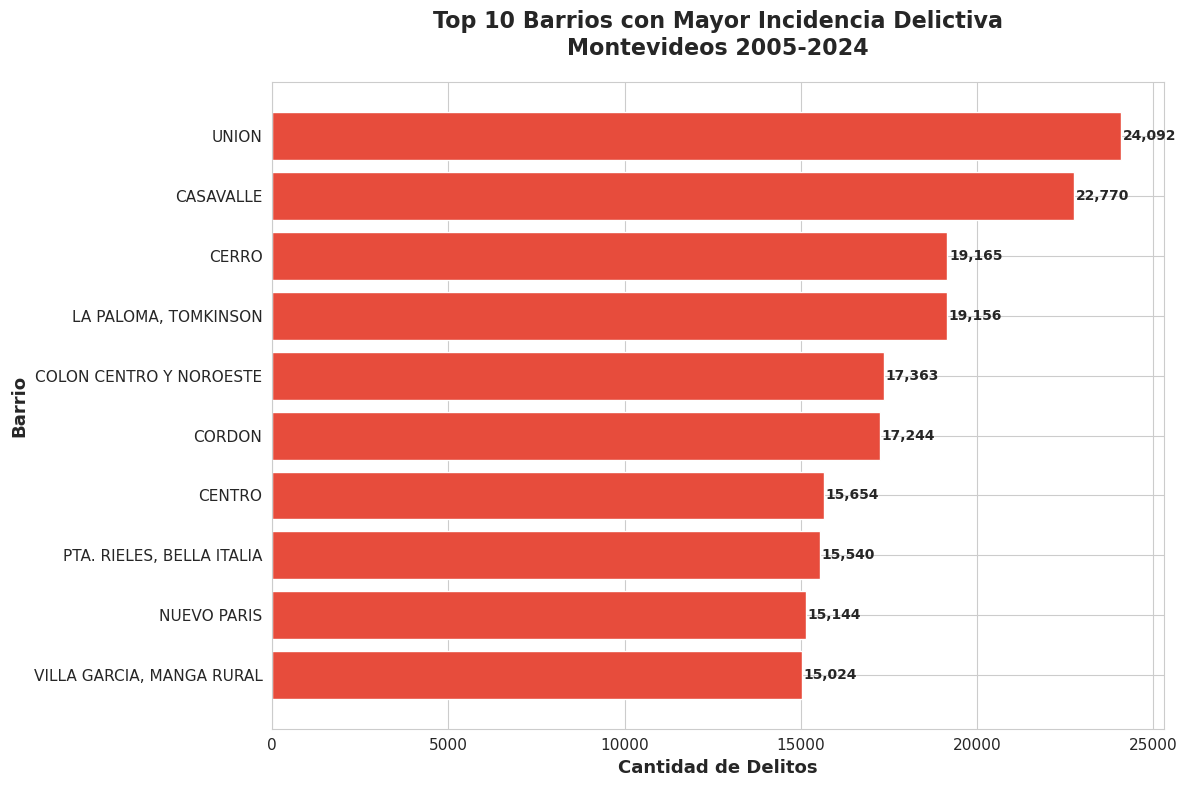

✅ Gráfico 1 guardado: ../output/graficos/grafico_1_top_barrios.png

💡 Insights:
   - El barrio más peligroso es: UNION
   - Total de delitos en top barrio: 24,092
   - Diferencia con el 2do lugar: 1,322 delitos


In [22]:
if not df.empty and 'BARRIO_MONTEVIDEO' in df.columns:
    # Calcular top 10 barrios
    top_barrios = df.groupby('BARRIO_MONTEVIDEO')['Cantidad_Crimenes'].sum().nlargest(10).sort_values()
    
    # Crear gráfico
    fig, ax = plt.subplots(figsize=(12, 8))
    bars = ax.barh(top_barrios.index, top_barrios.values, color=COLORS['danger'])
    
    # Personalizar
    ax.set_xlabel('Cantidad de Delitos', fontsize=13, fontweight='bold')
    ax.set_ylabel('Barrio', fontsize=13, fontweight='bold')
    ax.set_title('Top 10 Barrios con Mayor Incidencia Delictiva\nMontevideos 2005-2024', 
                 fontsize=16, fontweight='bold', pad=20)
    
    # Agregar valores en las barras
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 50, bar.get_y() + bar.get_height()/2, 
                f'{int(width):,}', ha='left', va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'grafico_1_top_barrios.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✅ Gráfico 1 guardado: {OUTPUT_DIR / 'grafico_1_top_barrios.png'}")
    
    # Insights
    print(f"\n💡 Insights:")
    print(f"   - El barrio más peligroso es: {top_barrios.index[-1]}")
    print(f"   - Total de delitos en top barrio: {int(top_barrios.values[-1]):,}")
    print(f"   - Diferencia con el 2do lugar: {int(top_barrios.values[-1] - top_barrios.values[-2]):,} delitos")

## 5. Gráfico 2: Evolución Temporal de Delitos

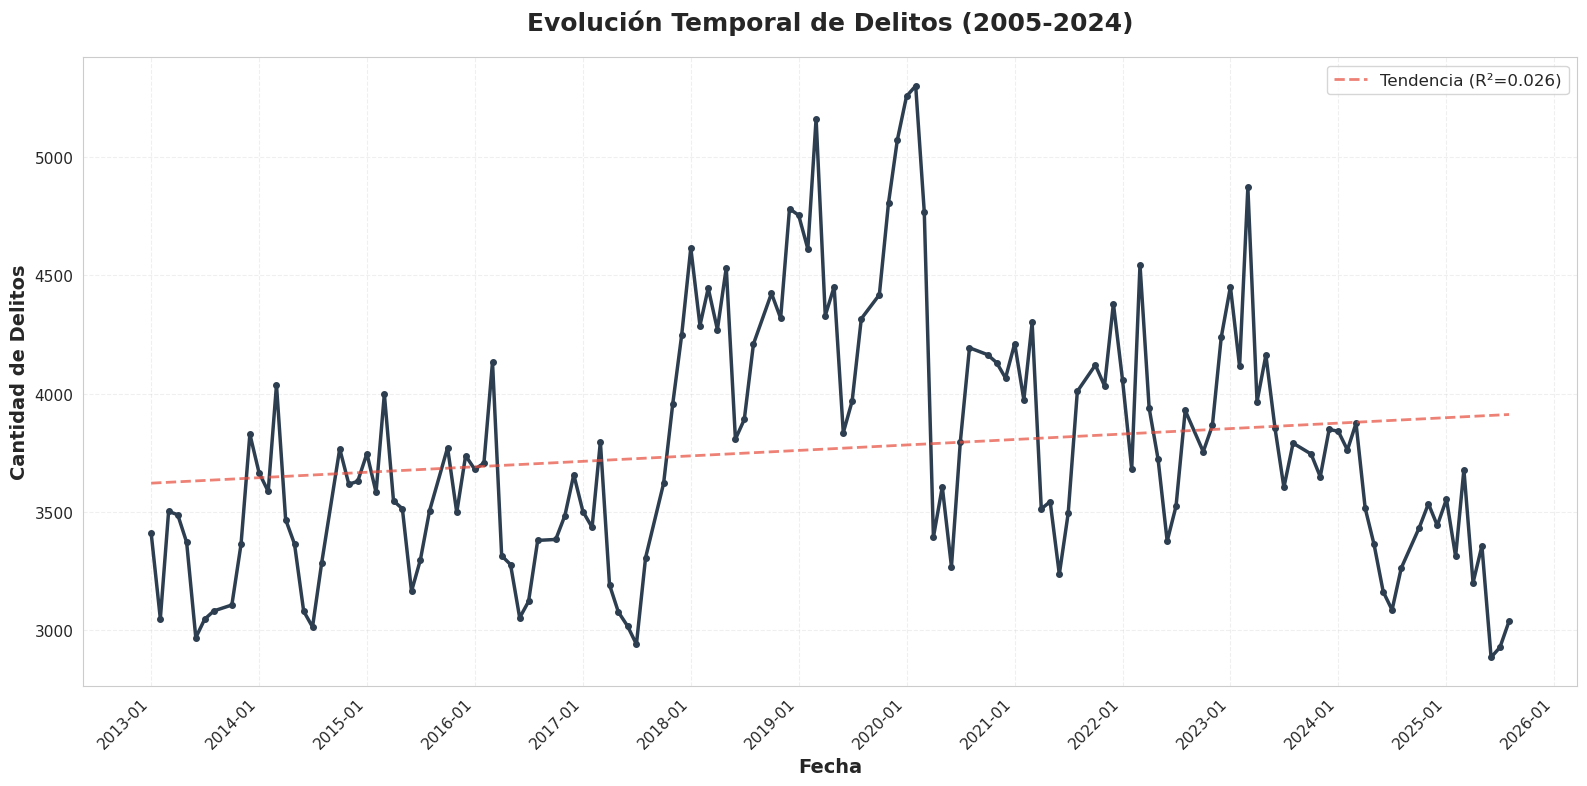


📈 INSIGHTS - EVOLUCIÓN TEMPORAL:
   • Período analizado: 2013-01 a 2025-08
   • Mes con más delitos: 2020-02 (5,301 delitos)
   • Mes con menos delitos: 2025-06 (2,886 delitos)
   • Promedio mensual: 3,767 delitos
   • Tendencia: CRECIENTE (+0.06 delitos por día)


In [23]:
if not df.empty and 'AÑO' in df.columns and 'MES' in df.columns:
    # Preparar datos temporales
    evolucion = df.groupby(['AÑO', 'MES'])['Cantidad_Crimenes'].sum().reset_index()
    
    # Mapeo de meses en español a números
    meses_map = {
        'ENERO': 1, 'FEBRERO': 2, 'MARZO': 3, 'ABRIL': 4,
        'MAYO': 5, 'JUNIO': 6, 'JULIO': 7, 'AGOSTO': 8,
        'SEPTIEMBRE': 9, 'OCTUBRE': 10, 'NOVIEMBRE': 11, 'DICIEMBRE': 12
    }
    
    # Convertir a datetime para mejor visualización
    # Crear columnas temporales con nombres en inglés requeridos por pandas
    evolucion_temp = evolucion.copy()
    evolucion_temp['year'] = evolucion_temp['AÑO']
    evolucion_temp['month'] = evolucion_temp['MES'].map(meses_map)
    evolucion_temp['day'] = 1
    
    evolucion['Fecha'] = pd.to_datetime(evolucion_temp[['year', 'month', 'day']])
    
    # Filtrar valores NaT (fechas inválidas) antes de ordenar
    evolucion = evolucion.dropna(subset=['Fecha'])
    evolucion = evolucion.sort_values('Fecha')
    
    # Crear gráfico
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.plot(evolucion['Fecha'], evolucion['Cantidad_Crimenes'], 
            linewidth=2.5, color=COLORS['primary'], marker='o', markersize=4)
    
    # Añadir línea de tendencia
    from scipy import stats
    x_numeric = (evolucion['Fecha'] - evolucion['Fecha'].min()).dt.days
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_numeric, evolucion['Cantidad_Crimenes'])
    trend_line = slope * x_numeric + intercept
    ax.plot(evolucion['Fecha'], trend_line, '--', color=COLORS['danger'], 
            linewidth=2, alpha=0.7, label=f'Tendencia (R²={r_value**2:.3f})')
    
    # Configuración del gráfico
    ax.set_title('Evolución Temporal de Delitos (2005-2024)', 
                 fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Fecha', fontsize=14, fontweight='bold')
    ax.set_ylabel('Cantidad de Delitos', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(fontsize=12)
    
    # Formato de fechas en el eje X
    import matplotlib.dates as mdates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.savefig('../output/graficos/grafico_2_evolucion_temporal.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Generar insights
    print("\n📈 INSIGHTS - EVOLUCIÓN TEMPORAL:")
    print(f"   • Período analizado: {evolucion['Fecha'].min().strftime('%Y-%m')} a {evolucion['Fecha'].max().strftime('%Y-%m')}")
    print(f"   • Mes con más delitos: {evolucion.loc[evolucion['Cantidad_Crimenes'].idxmax(), 'Fecha'].strftime('%Y-%m')} ({evolucion['Cantidad_Crimenes'].max():,.0f} delitos)")
    print(f"   • Mes con menos delitos: {evolucion.loc[evolucion['Cantidad_Crimenes'].idxmin(), 'Fecha'].strftime('%Y-%m')} ({evolucion['Cantidad_Crimenes'].min():,.0f} delitos)")
    print(f"   • Promedio mensual: {evolucion['Cantidad_Crimenes'].mean():,.0f} delitos")
    
    if slope > 0:
        print(f"   • Tendencia: CRECIENTE (+{slope:.2f} delitos por día)")
    else:
        print(f"   • Tendencia: DECRECIENTE ({slope:.2f} delitos por día)")
else:
    print("⚠️  No se encontraron datos de AÑO y MES para crear el gráfico de evolución temporal")

## 6. Gráfico 3: Distribución por Tipo de Delito

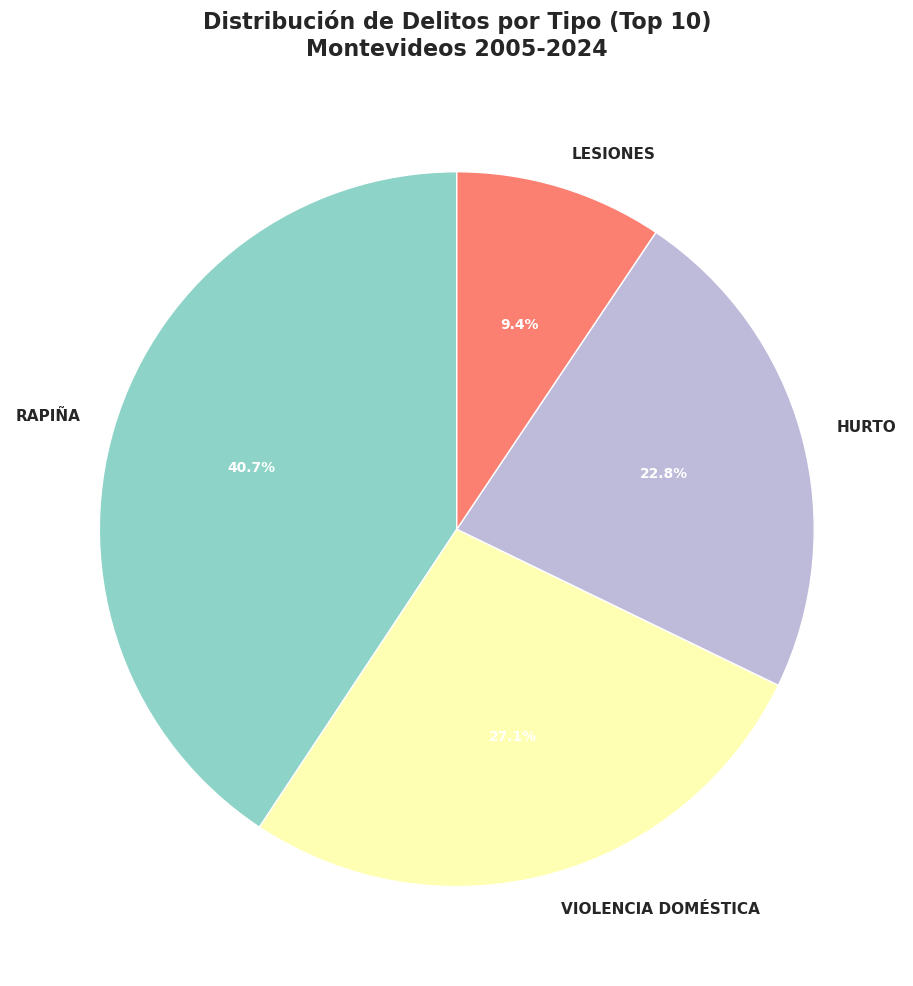

✅ Gráfico 3 guardado: ../output/graficos/grafico_3_distribucion_delitos.png

💡 Insights:
   - Tipo de delito más frecuente: RAPIÑA
   - Representa el 40.7% del total
   - Top 3 delitos concentran el 90.6% de los casos


In [24]:
if not df.empty and 'DELITO' in df.columns:
    # Calcular distribución de delitos
    delitos = df.groupby('DELITO')['Cantidad_Crimenes'].sum().nlargest(10).sort_values(ascending=False)
    
    # Crear gráfico de pie
    fig, ax = plt.subplots(figsize=(12, 10))
    colors_pie = plt.cm.Set3(range(len(delitos)))
    
    wedges, texts, autotexts = ax.pie(
        delitos.values, 
        labels=delitos.index, 
        autopct='%1.1f%%',
        startangle=90,
        colors=colors_pie,
        textprops={'fontsize': 11, 'fontweight': 'bold'}
    )
    
    # Hacer porcentajes más legibles
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(10)
        autotext.set_fontweight('bold')
    
    ax.set_title('Distribución de Delitos por Tipo (Top 10)\nMontevideos 2005-2024', 
                 fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'grafico_3_distribucion_delitos.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✅ Gráfico 3 guardado: {OUTPUT_DIR / 'grafico_3_distribucion_delitos.png'}")
    
    # Insights
    total = delitos.sum()
    print(f"\n💡 Insights:")
    print(f"   - Tipo de delito más frecuente: {delitos.index[0]}")
    print(f"   - Representa el {(delitos.values[0]/total*100):.1f}% del total")
    print(f"   - Top 3 delitos concentran el {(delitos.head(3).sum()/total*100):.1f}% de los casos")

## 7. Gráfico 4: Tentativas vs Delitos Consumados

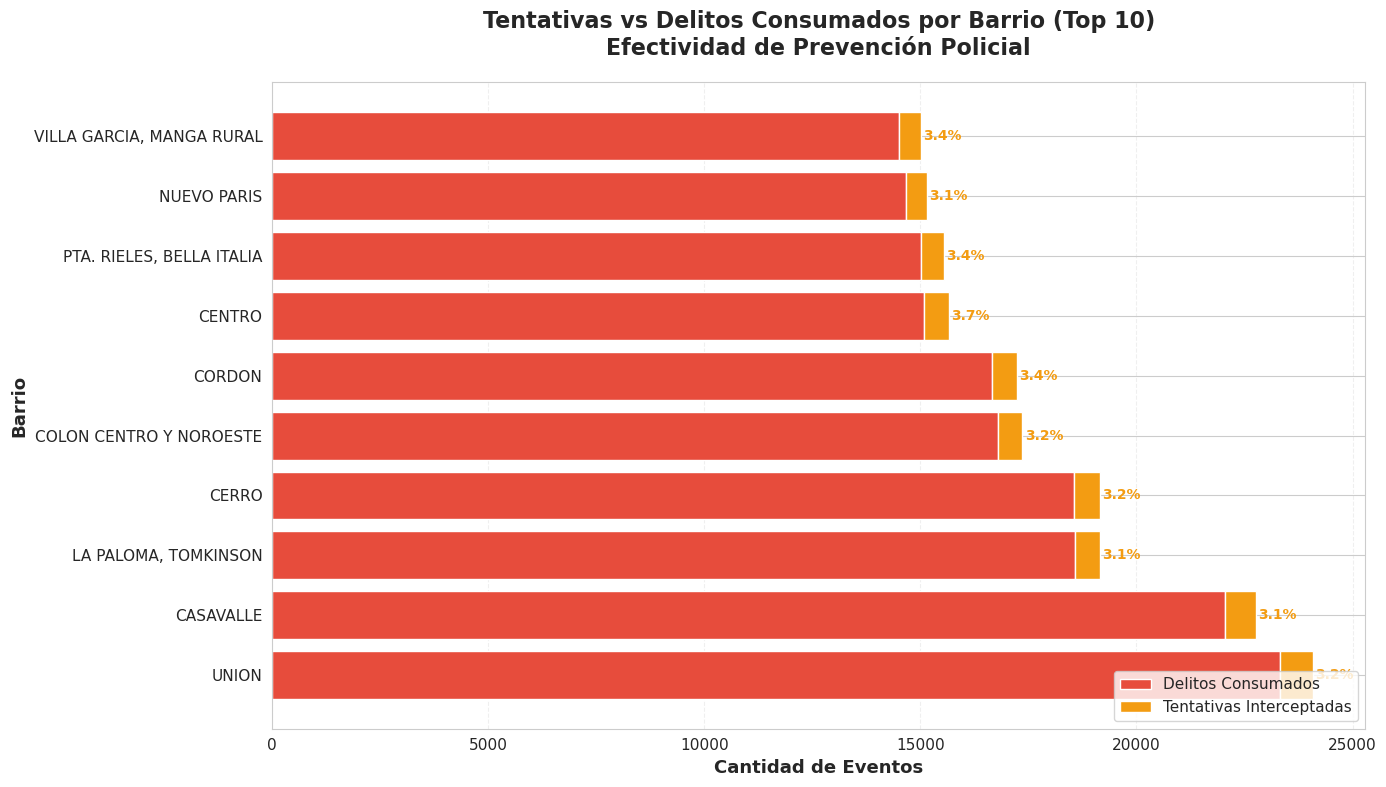

✅ Gráfico 4 guardado: ../output/graficos/grafico_4_tentativas_consumados.png

💡 Insights:
   - Total de tentativas interceptadas: 18,525
   - Total de delitos consumados: 554,577
   - Tasa de interceptación global: 3.23%
   - Barrio con mejor prevención: CENTRO (3.7%)
   - Barrio con peor prevención: LA PALOMA, TOMKINSON (3.1%)


In [25]:
if not df.empty and 'Tentativa_SI' in df.columns and 'Tentativa_NO' in df.columns:
    # Calcular tentativas vs consumados por barrio
    tentativas = df.groupby('BARRIO_MONTEVIDEO')[['Tentativa_SI', 'Tentativa_NO']].sum()
    tentativas = tentativas.nlargest(10, 'Tentativa_NO')
    
    # Crear gráfico de barras apiladas horizontal
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Posiciones de las barras
    y_pos = np.arange(len(tentativas))
    
    # Barras apiladas
    p1 = ax.barh(y_pos, tentativas['Tentativa_NO'], color=COLORS['danger'], label='Delitos Consumados')
    p2 = ax.barh(y_pos, tentativas['Tentativa_SI'], left=tentativas['Tentativa_NO'], 
                 color=COLORS['warning'], label='Tentativas Interceptadas')
    
    # Personalizar
    ax.set_yticks(y_pos)
    ax.set_yticklabels(tentativas.index)
    ax.set_xlabel('Cantidad de Eventos', fontsize=13, fontweight='bold')
    ax.set_ylabel('Barrio', fontsize=13, fontweight='bold')
    ax.set_title('Tentativas vs Delitos Consumados por Barrio (Top 10)\nEfectividad de Prevención Policial', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.legend(loc='lower right', fontsize=11)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Agregar porcentajes
    for i, (idx, row) in enumerate(tentativas.iterrows()):
        total = row['Tentativa_SI'] + row['Tentativa_NO']
        pct_interceptadas = (row['Tentativa_SI'] / total * 100) if total > 0 else 0
        ax.text(total + 50, i, f"{pct_interceptadas:.1f}%", 
                va='center', ha='left', fontsize=10, fontweight='bold', color=COLORS['warning'])
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'grafico_4_tentativas_consumados.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✅ Gráfico 4 guardado: {OUTPUT_DIR / 'grafico_4_tentativas_consumados.png'}")
    
    # Insights
    total_tentativas = df['Tentativa_SI'].sum()
    total_consumados = df['Tentativa_NO'].sum()
    tasa_interception = (total_tentativas / (total_tentativas + total_consumados)) * 100
    
    print(f"\n💡 Insights:")
    print(f"   - Total de tentativas interceptadas: {int(total_tentativas):,}")
    print(f"   - Total de delitos consumados: {int(total_consumados):,}")
    print(f"   - Tasa de interceptación global: {tasa_interception:.2f}%")
    
    # Barrio con mejor/peor tasa
    tentativas['tasa_interception'] = (tentativas['Tentativa_SI'] / 
                                        (tentativas['Tentativa_SI'] + tentativas['Tentativa_NO']) * 100)
    mejor_barrio = tentativas['tasa_interception'].idxmax()
    peor_barrio = tentativas['tasa_interception'].idxmin()
    
    print(f"   - Barrio con mejor prevención: {mejor_barrio} ({tentativas.loc[mejor_barrio, 'tasa_interception']:.1f}%)")
    print(f"   - Barrio con peor prevención: {peor_barrio} ({tentativas.loc[peor_barrio, 'tasa_interception']:.1f}%)")

## 9. Gráfico 6: Heatmap de Delitos por Mes y Año

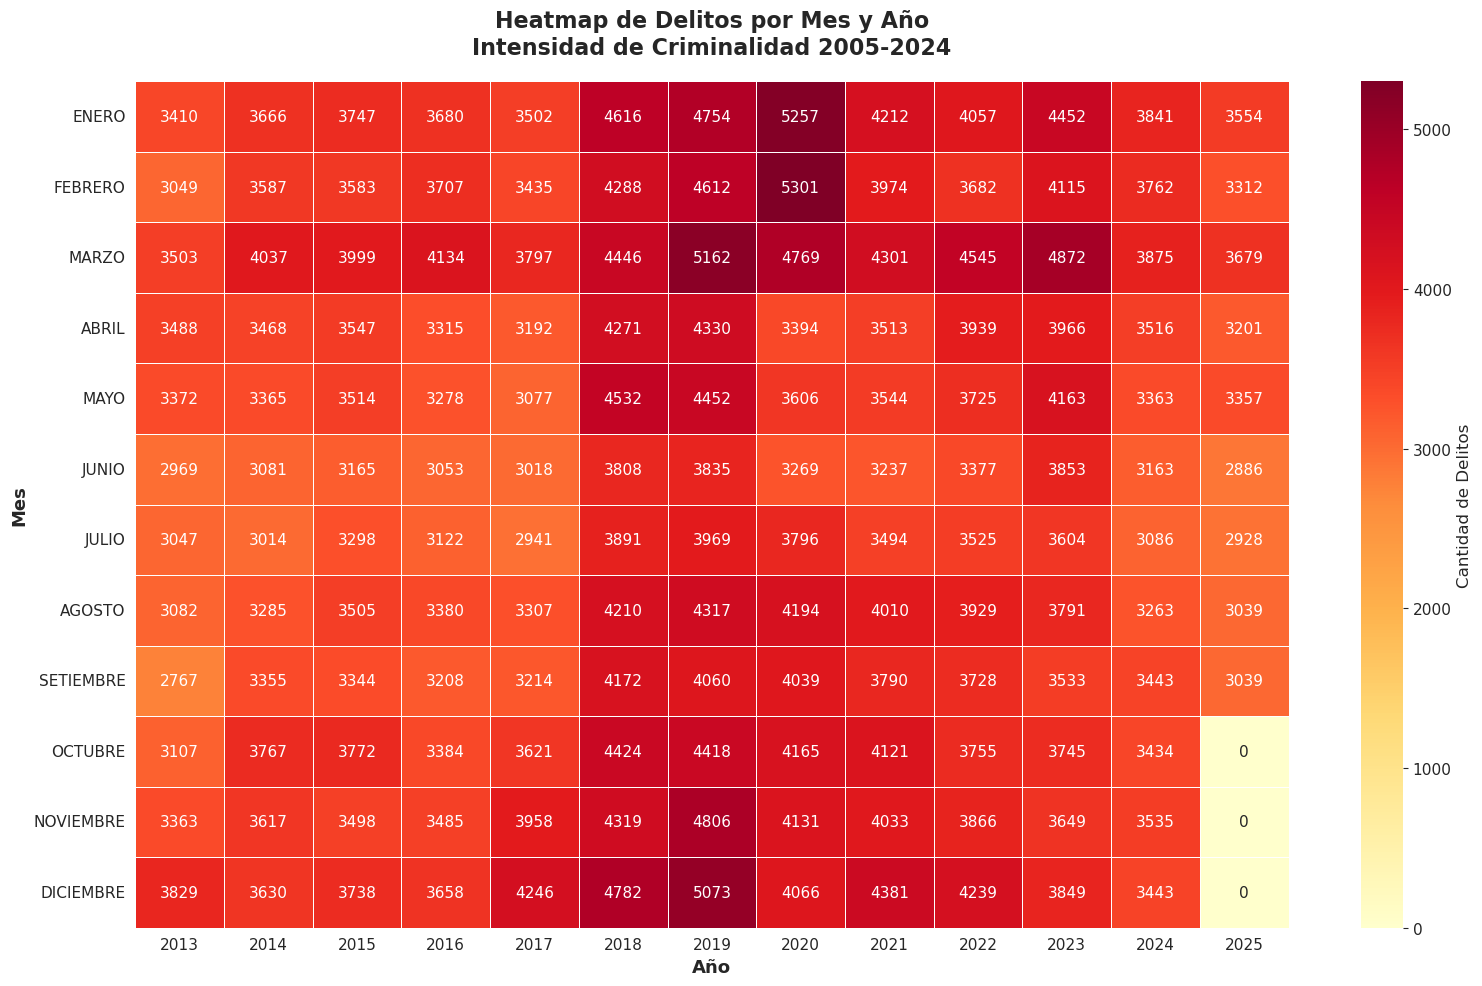

✅ Gráfico 6 guardado: ../output/graficos/grafico_6_heatmap_mes_año.png

💡 Insights:
   - Mes/Año con más delitos: FEBRERO 2020 (5,301 delitos)
   - Colores más intensos (rojos): Períodos de alta criminalidad
   - Colores claros (amarillos): Períodos de baja criminalidad


In [27]:
if not df.empty and 'AÑO' in df.columns and 'MES' in df.columns:
    # Crear tabla pivote para heatmap
    pivot = df.pivot_table(
        values='Cantidad_Crimenes', 
        index='MES', 
        columns='AÑO', 
        aggfunc='sum',
        fill_value=0
    )
    
    # Ordenar meses correctamente
    meses_orden = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO',
                   'JULIO', 'AGOSTO', 'SETIEMBRE', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']
    pivot = pivot.reindex([m for m in meses_orden if m in pivot.index])
    
    # Crear heatmap
    fig, ax = plt.subplots(figsize=(16, 10))
    
    sns.heatmap(
        pivot, 
        annot=True, 
        fmt='.0f', 
        cmap='YlOrRd', 
        linewidths=0.5,
        linecolor='white',
        cbar_kws={'label': 'Cantidad de Delitos'},
        ax=ax
    )
    
    # Personalizar
    ax.set_xlabel('Año', fontsize=13, fontweight='bold')
    ax.set_ylabel('Mes', fontsize=13, fontweight='bold')
    ax.set_title('Heatmap de Delitos por Mes y Año\nIntensidad de Criminalidad 2005-2024', 
                 fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / 'grafico_6_heatmap_mes_año.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✅ Gráfico 6 guardado: {OUTPUT_DIR / 'grafico_6_heatmap_mes_año.png'}")
    
    # Insights
    max_val = pivot.max().max()
    max_pos = pivot.stack().idxmax()
    
    print(f"\n💡 Insights:")
    print(f"   - Mes/Año con más delitos: {max_pos[0]} {int(max_pos[1])} ({int(max_val):,} delitos)")
    print(f"   - Colores más intensos (rojos): Períodos de alta criminalidad")
    print(f"   - Colores claros (amarillos): Períodos de baja criminalidad")

---
## 10. Resumen de Insights Clave
---

In [28]:
if not df.empty:
    print("="*80)
    print(" "*25 + "📊 RESUMEN EJECUTIVO")
    print("="*80)
    
    # 1. Volumetría
    total_delitos = df['Cantidad_Crimenes'].sum()
    print(f"\n1️⃣ VOLUMETRÍA")
    print(f"   • Total de delitos analizados: {int(total_delitos):,}")
    print(f"   • Registros procesados: {len(df):,}")
    
    # 2. Concentración geográfica
    if 'BARRIO_MONTEVIDEO' in df.columns:
        barrios_unicos = df['BARRIO_MONTEVIDEO'].nunique()
        top_3_barrios = df.groupby('BARRIO_MONTEVIDEO')['Cantidad_Crimenes'].sum().nlargest(3)
        concentracion = (top_3_barrios.sum() / total_delitos * 100)
        
        print(f"\n2️⃣ CONCENTRACIÓN GEOGRÁFICA")
        print(f"   • Total de barrios analizados: {barrios_unicos}")
        print(f"   • Top 3 barrios concentran: {concentracion:.1f}% de los delitos")
        print(f"   • Barrio más peligroso: {top_3_barrios.index[0]}")
    
    # 3. Efectividad policial
    if 'Tentativa_SI' in df.columns and 'Tentativa_NO' in df.columns:
        total_tentativas = df['Tentativa_SI'].sum()
        total_consumados = df['Tentativa_NO'].sum()
        tasa_efectividad = (total_tentativas / (total_tentativas + total_consumados)) * 100
        
        print(f"\n3️⃣ EFECTIVIDAD POLICIAL")
        print(f"   • Tentativas interceptadas: {int(total_tentativas):,}")
        print(f"   • Delitos consumados: {int(total_consumados):,}")
        print(f"   • Tasa de interceptación: {tasa_efectividad:.2f}%")
    
    # 4. Patrón temporal
    if 'AÑO' in df.columns:
        años = df.groupby('AÑO')['Cantidad_Crimenes'].sum()
        año_max = años.idxmax()
        año_min = años.idxmin()
        
        print(f"\n4️⃣ PATRÓN TEMPORAL")
        print(f"   • Año con más delitos: {int(año_max)} ({int(años[año_max]):,})")
        print(f"   • Año con menos delitos: {int(año_min)} ({int(años[año_min]):,})")
        
        # Calcular tendencia
        if len(años) > 1:
            cambio = ((años.iloc[-1] - años.iloc[0]) / años.iloc[0]) * 100
            if cambio > 0:
                print(f"   • Tendencia: ⬆️ Aumento del {cambio:.1f}% desde {int(años.index[0])}")
            else:
                print(f"   • Tendencia: ⬇️ Reducción del {abs(cambio):.1f}% desde {int(años.index[0])}")
    
    # 5. Recomendaciones
    print(f"\n5️⃣ RECOMENDACIONES ESTRATÉGICAS")
    print(f"   ✓ Reforzar presencia policial en los 3 barrios con mayor incidencia")
    print(f"   ✓ Implementar patrullaje preventivo en períodos de alta criminalidad")
    print(f"   ✓ Analizar factores socioeconómicos en zonas de concentración delictiva")
    print(f"   ✓ Replicar estrategias exitosas de barrios con baja incidencia")
    
    print("\n" + "="*80)
    print(f"\n✅ Análisis completado exitosamente")
    print(f"📁 Todos los gráficos guardados en: {OUTPUT_DIR.absolute()}")

                         📊 RESUMEN EJECUTIVO

1️⃣ VOLUMETRÍA
   • Total de delitos analizados: 573,102
   • Registros procesados: 451,929

2️⃣ CONCENTRACIÓN GEOGRÁFICA
   • Total de barrios analizados: 63
   • Top 3 barrios concentran: 11.5% de los delitos
   • Barrio más peligroso: UNION

3️⃣ EFECTIVIDAD POLICIAL
   • Tentativas interceptadas: 18,525
   • Delitos consumados: 554,577
   • Tasa de interceptación: 3.23%

4️⃣ PATRÓN TEMPORAL
   • Año con más delitos: 2019 (53,788)
   • Año con menos delitos: 2025 (28,995)
   • Tendencia: ⬇️ Reducción del 25.6% desde 2013

5️⃣ RECOMENDACIONES ESTRATÉGICAS
   ✓ Reforzar presencia policial en los 3 barrios con mayor incidencia
   ✓ Implementar patrullaje preventivo en períodos de alta criminalidad
   ✓ Analizar factores socioeconómicos en zonas de concentración delictiva
   ✓ Replicar estrategias exitosas de barrios con baja incidencia


✅ Análisis completado exitosamente
📁 Todos los gráficos guardados en: /home/jovyan/notebooks/../output/gr

---
## 11. Exportar Métricas Clave a CSV
---

In [29]:
if not df.empty:
    # Crear directorio para reportes
    reportes_dir = Path('../output/reportes')
    reportes_dir.mkdir(parents=True, exist_ok=True)
    
    # 1. Top barrios peligrosos
    if 'BARRIO_MONTEVIDEO' in df.columns:
        top_barrios_report = df.groupby('BARRIO_MONTEVIDEO').agg({
            'Cantidad_Crimenes': 'sum',
            'Tentativa_SI': 'sum',
            'Tentativa_NO': 'sum'
        }).sort_values('Cantidad_Crimenes', ascending=False)
        
        top_barrios_report['Tasa_Interception_%'] = (
            top_barrios_report['Tentativa_SI'] / 
            (top_barrios_report['Tentativa_SI'] + top_barrios_report['Tentativa_NO']) * 100
        ).round(2)
        
        top_barrios_report.to_csv(reportes_dir / 'reporte_barrios.csv')
        print(f"✅ Reporte de barrios guardado: {reportes_dir / 'reporte_barrios.csv'}")
    
    # 2. Evolución temporal
    if 'AÑO' in df.columns and 'MES' in df.columns:
        evolucion_report = df.groupby(['AÑO', 'MES'])['Cantidad_Crimenes'].sum().reset_index()
        evolucion_report.to_csv(reportes_dir / 'evolucion_temporal.csv', index=False)
        print(f"✅ Evolución temporal guardada: {reportes_dir / 'evolucion_temporal.csv'}")
    
    # 3. Distribución de delitos
    if 'DELITO' in df.columns:
        delitos_report = df.groupby('DELITO')['Cantidad_Crimenes'].sum().sort_values(ascending=False)
        delitos_report.to_csv(reportes_dir / 'distribucion_delitos.csv')
        print(f"✅ Distribución de delitos guardada: {reportes_dir / 'distribucion_delitos.csv'}")
    
    print(f"\n📊 Todos los reportes exportados a: {reportes_dir.absolute()}")

✅ Reporte de barrios guardado: ../output/reportes/reporte_barrios.csv
✅ Evolución temporal guardada: ../output/reportes/evolucion_temporal.csv
✅ Distribución de delitos guardada: ../output/reportes/distribucion_delitos.csv

📊 Todos los reportes exportados a: /home/jovyan/notebooks/../output/reportes


---
## Fin del Análisis

**Próximos pasos**:
1. Revisar los gráficos generados en `output/graficos/`
2. Utilizar los reportes CSV para análisis adicional
3. Incorporar visualizaciones en el documento final
4. Preparar presentación con insights clave

---